# P1: Convolutions, Fourier Transforms, and Image Pyramids

This is the first programming assignment you will be asked to complete in the course. As we are just starting off, I have tried to keep this assignment to a manageable size, though it is somewhat "scattered" in that there is not as much connectivity between the individual questions. In the future, I will give you assignments that are a bit more well-connected.

**Your solution must be typed and you are encouraged to LaTeX your solutions to this assignment.** You are not required to use any particualr style, but please use 1-column format with 12pt font, which makes it easier for me to grade (owing to some chronic eye strain that makes it hard for me to read fonts much smaller than that for very long). Overleaf is an online LaTeX editor with a free tier, so feel free to use that service to compose your writeups. It is perhaps the easiest option, particularly if you are not as familiar with LaTeX. You are allowed to work in small groups (2 or 3 students), but your solutions and your writeup should be your own.

I expect that your solutions will be written clearly; you should be trying to convince me through your writing that you have implemented and understand the algorithms. You should write in full sentences. It is not necessary to include paragraphs of text or supporting evidence, though you should feel free to add more detail when appropriate if you do not believe that your solutions as they exist are comprehensive (or are unsure if it they are correct and are seeking partial credit, since this helps us better identify where you may have made mistakes).

**I have tried my best to clearly mark PLOTS, IMAGES, QUESTION, etc., which are the items we are specifically looking for in your writeup.** These are the things we expect to see and will be used to evaluate your grade. For example, if a line is marked **PLOT**, we expect to see a plot for that particular objective in the writeup. The only exception is **TASK**, which is only there to highlight what you will need to accomplish as a prerequisite for other deliverables.

Questions are not all of equal weight, though we try to balance them so that each has value roughly comparable to how much time we expect each to take. I will discuss my grading scheme in the lectures and again once the first assignments are returned.

**You should submit both the PDF of your writeup and a .zip file containing your code (which may be a modified form of the assigned Jupyter notebook) on Canvas.** You should not include code snippets in your writeup unless it is explicitly asked for or you think it helps you explain your results or answer the question. We will not likely execute your code unless we are skeptical for academic integrity reasons. We may also use your code to evaluate partial credit on multi-part assignments.

In [2]:
# Starter code (run this first)
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.signal
from PIL import Image

def load_image(filepath):
    """Loads an image into a numpy array.
    Note: image will have 3 color channels [r, g, b]."""
    img = Image.open(filepath)
    return (np.asarray(img).astype(float)/255)[:, :, :3]

## P1.1 Getting Started With Filtering

In this first assignment, you will be writing functions to generate your own image filters and using them to process images. For this problem, **you are encouraged to use an image of your own choosing** (with a size of roughly 500px along either dimension), but you are also free to use the image I have provided.

**You do not need to implement the convolution yourself.** Your version will be slower than the version built in to `scipy.signal`, which you are welcome to use. I have provided you with some simple code to get you started:

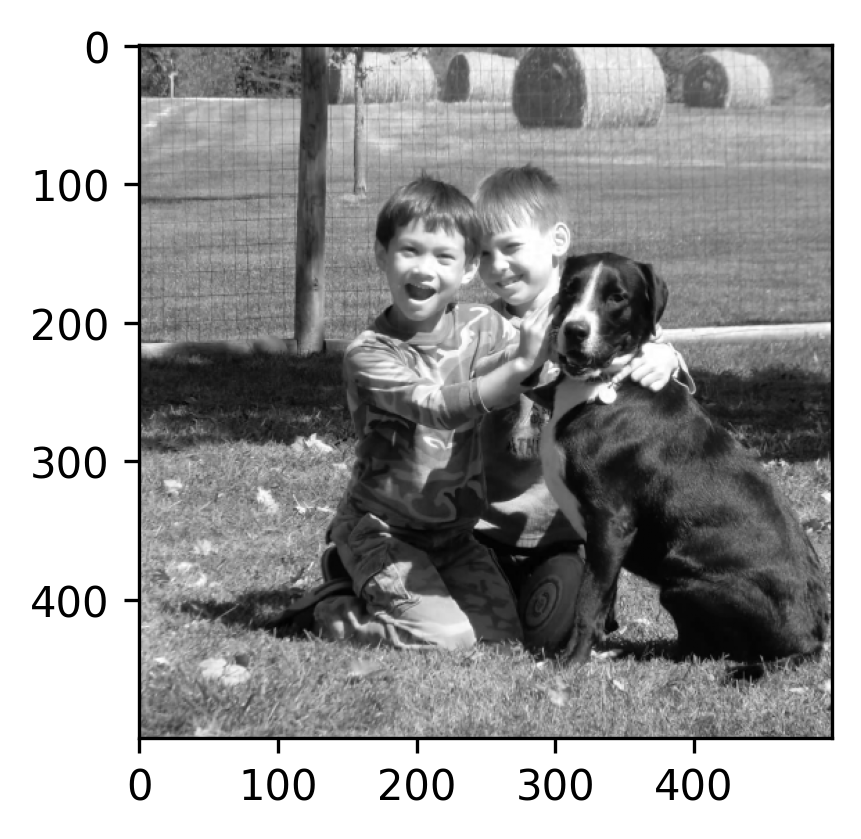

In [3]:
import scipy.signal

image = load_image("Homework 1 image.png")[:, :, 0]
example_filter = [
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
]
filtered_image = scipy.signal.convolve2d(
    image, example_filter, mode='same')

fig = plt.figure(figsize=(3, 3), dpi=300)
plt.imshow(filtered_image, cmap='gray')

None

### P1.1.1 Some Simple Filters

**PLOTS** Apply the following filters to your image and plot them. Include these in your writeup.

**QUESTION** (1-2 sentences for each filter) For each, describe the effects the filter has on the image (and name it if you've seen it before). Which filters are *separable*? For the separable filters, write their components parts:

$$f_a = \frac{1}{9}\begin{bmatrix} 
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1 \end{bmatrix} $$
    
$$f_b = \frac{1}{3}\begin{bmatrix} 
    0 & 0 & 0 \\
    1 & 1 & 1 \\
    0 & 0 & 0 \end{bmatrix} $$

$$f_c = \frac{1}{6}\begin{bmatrix} 
    -1 & 0 & 1 \\
    -1 & 0 & 1 \\
    -1 & 0 & 1 
    \end{bmatrix} $$
    
$$f_d = \frac{1}{3}\begin{bmatrix} 
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 
    \end{bmatrix} $$

In [ ]:
# Starter code + plotting helper function
image = load_image("P1_convolutions_fourier_resizing/P1_convolutions_fourier_resizing/light_cubes_sm.png")[::4, ::4, 0]

def plot_before_after(image, filt, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Image")
    plt.subplot(1, 3, 2)
    plt.imshow(filt, vmin=-0.4, vmax=0.4, cmap='PiYG')
    plt.title("Filter")
    plt.subplot(1, 3, 3)
    plt.imshow(scipy.signal.convolve(
            image, filt, mode='same'))
    plt.title(title)

fa = None
fb = None
fc = None
fd = None

In [ ]:
# Plotting Code

if fa is None or fb is None or fc is None or fd is None:
    raise NotImplementedError()

plot_before_after(image, fa, 'fa')
plot_before_after(image, fb, 'fb')
plot_before_after(image, fc, 'fc')
plot_before_after(image, fd, 'fd')

### P1.1.2 Image Derivatives

**PLOTS** Plot the following for the images you have chosen and include them in your writeup:
- **2 Plots** The image derivatives $I_x$ and $I_y$, computed using the vertical and horizontal Sobel filters.
- **2 Plots** Using $I_x$ and $I_y$, compute the image gradient magnitude and angle; include figures of both.


Be sure to title your plots so that it is clear which plot is which. Feel free to use the plotting code I have provided you below.

*Note*: You should be attentive with your color schemes for your plots. When plotting image derivatives, using a color map like `gray` or `viridis` assigns a middle value to a non-recognizable color somewhere in the middle of the spectrum. You might want to look into a *diverging color map* like `PiYG` and set the `vmin` and `vmax` args for `imshow` so that the zero-crossing is a *special value* of pure white. See the [matplotlib guide on colormaps](https://matplotlib.org/3.3.0/tutorials/colors/colormaps.html) for more details.

### P1.1.3 The Laplacian Filter

**QUESTION** Using a finite-difference method, derive a filter for the image Laplacian: $$\nabla^2 I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}$$ Include this derivation (and the resulting 3x3 filter) in your writeup. To answer this question, you might want to revisit the derivation for the *central finite difference* from lecture. For this question, you may find useful the [wikepedia page for finite differences](https://en.wikipedia.org/wiki/Finite_difference) and the 'second order central' derivative.

**PLOT**  Compute and plot the Laplacian for your image.

### P1.1.4 Gaussian Filtering

Compute a discrete Gaussian Filter by completing the function `get_gaussian_filter` defined below. A Gaussian function has the following form:
$$ G(x, y) = a \,\exp\left(- \frac{x^2 + y^2}{2 \sigma^2} \right) $$
where = $\exp(a)$ is the natural exponential ($\exp(a) = e^a$), $\sigma$ (the standard deviation) and $a$ are parameters, and the coordinates $x$ and $y$ are distances (in pixels) from the center of the filter. For example, if I had a 3x3 filter and wanted the value of the center coordinate (1, 1), $G(x=0, y=0) = a$. At the corner $G(x=1, y=1) = a \exp{-1/\sigma^2}$.

**TASK + PLOTS** Compute filters of three different $\sigma$ values and apply them to your image (you should be able to see the difference in amount of blur between them). Plot the filters alongside the images they are used to generate (feel free to use the `plot_before_after` function I've provided). Be sure that the filter width is large enough that it does not meaningfully impact the output (a standard convention is to ensure that the filter width is at least $3\sigma$). Include the plots in your writeup. *NOTE: as in the lecture slides, most of the "mass" of the filters should be in the center. If your highest value is in the corner, you have not implemented the filter correctly.*

**QUESTION:** (2-3 sentences) What would happen if the filter width were too small compared to $\sigma$? You may answer in words, though a figure would also be acceptable.

In class, we defined a `3x3` Gaussian filter as follows:
$$g = \frac{1}{16}\begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix}$$

**QUESTION** What is the $\sigma$ of this filter? The *approximate* value is 0.85, which you can confirm by plugging that value in to your `get_gaussian_filter` function, but I want an *exact* answer, for which you will need to do a bit of algebra. [A numerical solution cannot receive full credit] *Hint: the answer has a natural logarithm in it.*


In [ ]:
import numpy as np

image = load_image("P1_convolutions_fourier_resizing/P1_convolutions_fourier_resizing/light_cubes_sm.png")[:, :, 0]

def plot_before_after(image, filt, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Image")
    plt.subplot(1, 3, 2)
    plt.imshow(filt)
    plt.title("Filter")
    plt.subplot(1, 3, 3)
    plt.imshow(scipy.signal.convolve(
            image, filt, mode='same'))
    plt.title(title)

def get_gaussian_filter(filter_size, sigma):
    """Will return a filter of dimensions (filter_size, filter_size) 
    with values according to 'G' above. 
    
    Note: the filter is normalized, g.sum().sum() == 1, which determines
    the value of parameter a."""
    raise NotImplementedError()

In [ ]:
# Results/Plotting code

gaussian_filter = get_gaussian_filter(51, 2)
plot_before_after(image, gaussian_filter, 'Gaussian sigma=2')

gaussian_filter = get_gaussian_filter(51, 5)
plot_before_after(image, gaussian_filter, 'Gaussian sigma=5')

gaussian_filter = get_gaussian_filter(51, 10)
plot_before_after(image, gaussian_filter, 'Gaussian sigma=10')

gaussian_filter = get_gaussian_filter(11, 10)
plot_before_after(image, gaussian_filter, 'Gaussian sigma=10 (too small)')

### P1.1.5 Derivative of Convolution

In class, we discussed the derivative of convolution theorem:

$$ \frac{\partial }{\partial x} (f * h) = \frac{\partial f}{\partial x} * h $$

In words, this theorem says that the derivative of a filtered image is equivalent to first taking the derivative of a filter and then applying the resulting differentiated filter to the image.

**PLOTS** Show empirically that this theorem holds on your image; this means computing the left side of the equation, the right side of the equation and then showing that they match. The partial derivatives can be computed numerically via the Sobel filters or numerically using your understanding of calculus. Feel free to use any filter you would like to demonstrate this property. Hint: *compute the left side of the equation, compute the right side of the equation, and then show that the difference between them results in some very small values (much smaller than the magnitude of the signal itself).*

## P1.2 Upsampling

In class, we discussed *Image Upsampling*, the process of making larger images from smaller ones by interpolating between the discrete pixel values. Upsampling (and the interpolation process) will become quite relevant in a few weeks when we discuss image warping.

### P1.2.1 1D Upsampling Kernels

First, we'll begin by implementing an interpolation function that works on a 1-dimensional signal before attempting to upsample a 2-dimensional image.

Your task is to complete the `interp_STRATEGY` functions I have provided below. For each function, you are asked to provide the original signal and the `new_x` values at which you would like the new value. I have provided you with the `upsample_signal` function that will use the interpolation function you will create. Make sure you understand what is going on in that function. In particular, I have used the `np.ndenumerate` function to loop through the numpy signals.

**TASK & PLOTS** Implement the three different interpolation strategies listed below: *nearest neighbor*, *linear*, and *cubic* (See Ch 3.5 in Szeliski for a discussion of these strategies. **Note: You will need to concult Szeliski Ch 3.5 for the definition of the cubic interpolation function). Note that *bicubic* interpolation requires selecting a *boundary condition* for points outside the image; feel free to choose a "zero" boundary condition: i.e. return 0 whenever a point outside the image is requested. After interpolation, confirm that downsampling your upsampled image recovers your uninterpolated image for each upsampling function. Include the resulting figure (with all four plots) in your writeup.

**CODE** Include your implementation of the Bilinear and Bicubic interpolation functions in your writeup.

**QUESTION** (4-6 sentences) Describe the differences between the different interpolation techniques. How close are each to the original signal?

In [ ]:
def upsample_signal(signal, target_size, interp_fn):
    # Initialize the upsampled image
    signal_up = np.zeros([target_size])
    
    # Define the new coordinates (using the [y, x] convention
    # since image matrices are defined [row, column])
    new_xs = np.linspace(0, signal.size-1, 
                         target_size, endpoint=True)

    # Loop through coordinates and set the image values
    for ix, new_x in np.ndenumerate(new_xs):
        signal_up[ix] = interp_fn(signal, new_x)

    return signal_up


def compute_example_signal(length=256, step_width=64, seed=8616):
    """Compue and return an example signal."""
    np.random.seed(seed)
    step_center = length//2
    x = np.arange(length) - step_center
    signal = (np.abs(x) < step_width/2).astype(float)
    # Add noise to the signal
    signal += np.random.normal(scale=0.05, size=signal.shape)
    return scipy.signal.convolve(signal, np.ones([12])/12, mode='same')


def interp_nn_1d(signal, new_x):
    nx = int(round(new_x))
    if nx < 0:
        nx = 0

    return signal[nx]

def interp_linear(signal, new_x):
    raise NotImplementedError()
    
def interp_cubic(signal, new_x):
    raise NotImplementedError()

In [ ]:
## Results and plotting code

# Images
signal = compute_example_signal(length=257, step_width=64)
x = np.arange(len(signal))
signal_sm = signal[::16]
x_sm = x[::16]

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(141)
plt.plot(x, signal, 'k')
plt.plot(x, signal, 'b', alpha=0.15)
plt.plot(x_sm, signal_sm, 'b.')
plt.title("Original Signal")
plt.subplot(142)
plt.plot(x, upsample_signal(signal_sm, len(x), interp_nn_1d), 'k')
plt.plot(x, signal, 'b', alpha=0.15)
plt.plot(x_sm, signal_sm, 'b.')
plt.title("NN Upsampled Signal")
plt.subplot(143)
plt.plot(x, upsample_signal(signal_sm, len(x), interp_linear), 'k')
plt.plot(x, signal, 'b', alpha=0.15)
plt.plot(x_sm, signal_sm, 'b.')
plt.title("Linear Upsampled Signal")
plt.subplot(144)
plt.plot(x, upsample_signal(signal_sm, len(x), interp_cubic), 'k')
plt.plot(x, signal, 'b', alpha=0.15)
plt.plot(x_sm, signal_sm, 'b.')
plt.title("Cubic Upsampled Signal")
plt.show()

None

### P1.2.2 2D Upsampling Kernels (for Images)

In this part of the problem, you will be asked to upsample an image using some of the interpolation strategies we discussed in class. I have provided an image and its downsampled version.

**TASK & PLOTS** Your task is to complete the `interp_STRATEGY` functions I have provided below. For each function, you are asked to provide the original image and the `new_x` and `new_y` values at which you would like the new value. I have provided you with the `upsample_image` function that will use the interpolation function you will create. Make sure you understand what is going on in that function. In particular, I have used the `np.ndenumerate` function to loop through the numpy arrays and the `image[y, x]` convention (since the image is stored as `[rows, columns]`). Include the resulting plots in your writeup.

**CODE** Include your implementation of the Bilinear and Bicubic interpolation functions in your writeup.

*Hint: Interpolation is a linear operation. You can interpolate along one axis and then interpolate along another. You should feel free to use your solutions from the 1D example in your solution below.*

I have also provided you with some code that uses the OpenCV implementation of linear and cubic interpolation. These are for your reference. If implemented correctly, your result should look quite similar (though not *exactly* the same since OpenCV uses a specific value for the free parameter for cubic interpolation that you may not use). 

In [ ]:
## Starter Code

def compute_example_signal(length=256, step_width=64):
    """Compue and return an example signal."""
    step_center = length//2
    x = np.arange(length) - step_center
    signal = (np.abs(x) < step_width/2).astype(float)
    # Add noise to the signal
    signal += np.random.normal(scale=0.05, size=signal.shape)
    return signal

def upsample_image(image, target_shape, interp_fn):
    # Initialize the upsampled image
    image_up = np.zeros(target_shape)
    
    # Define the new coordinates (using the [y, x] convention
    # since image matrices are defined [row, column])
    new_xs = np.linspace(0, image.shape[1]-1, 
                         target_shape[1], endpoint=True)
    new_ys = np.linspace(0, image.shape[0]-1, 
                         target_shape[0], endpoint=True)
    
    # Loop through coordinates and set the image values
    for ix, new_x in np.ndenumerate(new_xs):
        for iy, new_y in np.ndenumerate(new_ys):
            image_up[iy, ix] = interp_fn(image, new_x, new_y)
            
    return image_up

def interp_nn(image, new_x, new_y):
    nx = int(round(new_x))
    ny = int(round(new_y))
    if nx < 0:
        nx = 0
    if ny < 0:
        ny = 0

    return image[ny, nx]
    
def interp_bilinear(image, new_x, new_y):
    raise NotImplementedError()
    
def interp_bicubic(image, new_x, new_y):
    raise NotImplementedError()

In [ ]:
## Plotting / Results data

# Load data
image = load_image("P1_convolutions_fourier_resizing/P1_convolutions_fourier_resizing/light_cubes_sm.png")[:, :, 0]
image_sm = image[::10, ::10]

# Nearest Neighbor
image = load_image("P1_convolutions_fourier_resizing/P1_convolutions_fourier_resizing/light_cubes_sm.png")[:, :, 0]
image_sm = image[::10, ::10]
image_up_nn = upsample_image(image_sm, image.shape, interp_nn)
fig = plt.figure()
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(image_sm)
plt.title('Downsampled')
plt.subplot(1, 3, 3)
plt.imshow(image_up_nn)
plt.title('Nearest Neighbor')

# Bilinear
image = load_image("P1_convolutions_fourier_resizing/P1_convolutions_fourier_resizing/light_cubes_sm.png")[:, :, 0]
image_sm = image[::10, ::10]
image_up_bilinear = upsample_image(image_sm, image.shape, interp_bilinear)
fig = plt.figure()
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(image_sm)
plt.title('Downsampled')
plt.subplot(1, 3, 3)
plt.imshow(image_up_bilinear)
plt.title('Bilinear')

# Bicubic
image_up_bicubic = upsample_image(image_sm, image.shape, interp_bicubic)
fig = plt.figure()
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(image_sm)
plt.title('Downsampled')
plt.subplot(1, 3, 3)
plt.imshow(image_up_bicubic)
plt.title('Bicubic')

None

In [ ]:
# Do the same thing with OpenCV (for reference)
import cv2
plt.figure()
plt.subplot(121)
plt.imshow(cv2.resize(image_sm, image.shape, interpolation=cv2.INTER_LINEAR))
plt.subplot(122)
plt.imshow(cv2.resize(image_sm, image.shape, interpolation=cv2.INTER_CUBIC))

None

### P1.2.3 Upsampling and Fourier Transforms

One can also upsample images using a Fourier Transform using a technique known as *zero padding* ([here is a link](https://dsp.stackexchange.com/a/745) to a surprisingly succinct discussion of the rationale behind this approach from Stack Exchange). The idea behind zero padding is to (1) Fourier Transform your signal, (2) add zero-valued elements to the signal in frequency space (thereby making the vector or matrix larger and adding new frequency components that have zero amplitude) and (3) transforming back.

Here, I have provided you with some code to inspect the frequency-space images of the various upsampling strategies. There is no coding involved with answering this question. The code block I have provided uses the numpy `np.fft.fft2` to compute a Fourier Transform of an image. One thing you will notice is that using the FFT implementation provided by numpy results in most of the "mass" in frequency space near the corner of the images. See the code below for an example; note that I have also included the $\log$ of the frequency space representation (and added a very small value to the frequency space image to account for values that may be zero), because it helps you get an idea of what is happening at the higher frequencies, which exist at the center of the image.

> Note: If you could not complete the interpolation question, you should feel free to use the outputs from OpenCV here instead.

**PLOT:** Include the plot of the nearest neighbor upsampled image and its frequency-space representation in your writeup. 

**QUESTION:** (1-2 sentences) The NN upsampled image seems to have a grid-like structure. How do each of the grid cells seem to relate (visually) to the frequency-space representation of the small non-upsampled image?

**QUESTION:** (2-4 sentences) The "center" of each of the frequency-space correspond to the highest-frequency terms in the representation (components that oscilate quite quickly in image-space). Discuss the difference between the NN-upsampled and bilinear-upsampled frequency-space representation: which has more high-frequency components and how is this related to the "sharpness" of the edges in the different upsampling strategies?


In [ ]:
# Inspecting the Frequency Space Representation

image = load_image("P1_convolutions_fourier_resizing/P1_convolutions_fourier_resizing/light_cubes_sm.png")[:, :, 0]
image_sm = image[::10, ::10]

def plot_freq_space_representation(img, title="Img"):
    fig = plt.figure(figsize=(12, 6), dpi=300)
    ax = plt.subplot(1, 3, 1)
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

    ax = plt.subplot(1, 3, 2)
    ax.imshow(np.abs(np.fft.fft2(img)))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('abs(Frequency Space Img)')

    ax = plt.subplot(1, 3, 3)
    ax.imshow(np.log(np.abs(np.fft.fft2(img)) + 1e-10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('log(abs(Frequency Space Img))')

    None
    
plot_freq_space_representation(image_sm, "Small Image")
plot_freq_space_representation(image, "Big Image")
plot_freq_space_representation(image_up_nn, "NN Image")
plot_freq_space_representation(image_up_bilinear, "Bilinear Image")
plot_freq_space_representation(image_up_bicubic, "Bicubic Image")

## P1.3 Hybrid Images

In class, we discussed *hybrid images* in which the low-frequency components of one image are added to the high-frequency components of another and added together to make an image that looks like their different components up close and from far away. See the [Hybrid Images paper](https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf) for more details about the original research. Here, you are asked to implement a simplified version of the Hybrid Images work.

Steps for completion:

1. Choose two images you intend to combine to form your *hybrid image*.
2. Implement a low-pass filter (using a Gaussian Blur: $g_{\sigma_1}$) and a high-pass filter: the original image (i.e., the identity filter) minus a Gaussian Blurred image: $\mathbb{I} - g_{\sigma_2}$. Apply the low-pass filter to one image and the high-pass filter to the other and average the two together. You may need to experiment with parameters $\sigma_1$ and $\sigma_2$.

**2 IMAGES** Include the original (unmodified) images in your writeup

**2 IMAGES** Include your low-pass filter applied to one of the images and the high-pass filter applied to the other.

**IMAGE** Include the final "hybrid" you have created by averaging the two images together.

**IMAGE** *Generate a Gaussian image pyramid* from your newly constructed hybrid image. Ensure all images in the pyramid are included in your writeup. If you would like, combine all images into a single image as follows (without annotations): <img src="image_pyramid.png" alt="Image Pyramid" style="width: 400px;"/>